<a href="https://colab.research.google.com/github/tzsoulcap/Spam-Classification-with-TFIDF-BOW/blob/master/Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA

In [ ]:
import pandas as pd
import re

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Research/Datasets/spam text.csv")

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.isna().sum()

Category    0
Message     0
dtype: int64

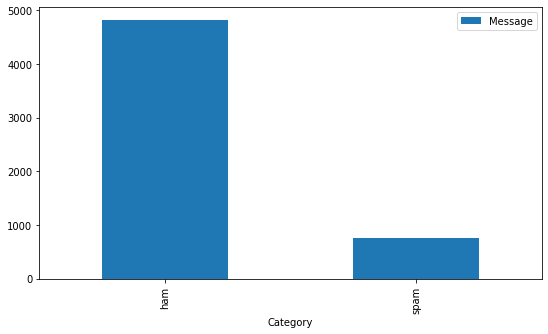

In [ ]:
df.groupby('Category').count().plot(kind='bar', figsize=(9, 5))

## Data Cleansing

### import data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Research/Datasets/spam text.csv")

### import lib

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Create Function

In [ ]:
stop = stopwords.words('english')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [ ]:
contraction_mapping = {
    "ain't": "is not", 
    "aren't": "are not",
    "can't": "cannot", 
    "'cause": "because", 
    "could've": "could have", 
    "couldn't": "could not", 
    "didn't": "did not",  
    "doesn't": "does not", 
    "don't": "do not", 
    "hadn't": "had not", 
    "hasn't": "has not", 
    "haven't": "have not", 
    "he'd": "he would",
    "he'll": "he will", 
    "he's": "he is", 
    "how'd": "how did", 
    "how'd'y": "how do you", 
    "how'll": "how will", 
    "how's": "how is",  
    "I'd": "I would", 
    "I'd've": "I would have", 
    "I'll": "I will", 
    "I'll've": "I will have",
    "I'm": "I am", 
    "I've": "I have", 
    "i'd": "i would", 
    "i'd've": "i would have", 
    "i'll": "i will",  
    "i'll've": "i will have",
    "i'm": "i am", 
    "i've": "i have", 
    "isn't": "is not", 
    "it'd": "it would", 
    "it'd've": "it would have", 
    "it'll": "it will", "it'll've": 
    "it will have","it's": "it is", 
    "let's": "let us", 
    "ma'am": "madam", 
    "mayn't": "may not", 
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have", 
    "must've": "must have", 
    "mustn't": "must not", 
    "mustn't've": "must not have", 
    "needn't": "need not", 
    "needn't've": "need not have",
    "o'clock": "of the clock", 
    "oughtn't": "ought not", 
    "oughtn't've": "ought not have", 
    "shan't": "shall not", 
    "sha'n't": "shall not", 
    "shan't've": "shall not have", 
    "she'd": "she would", 
    "she'd've": "she would have", 
    "she'll": "she will", 
    "she'll've": "she will have", 
    "she's": "she is", 
    "should've": "should have", 
    "shouldn't": "should not", 
    "shouldn't've": "should not have", 
    "so've": "so have",
    "so's": "so as", 
    "this's": "this is",
    "that'd": "that would", 
    "that'd've": "that would have", 
    "that's": "that is", 
    "there'd": "there would", 
    "there'd've": "there would have", 
    "there's": "there is", 
    "here's": "here is",
    "they'd": "they would", 
    "they'd've": "they would have", 
    "they'll": "they will", 
    "they'll've": "they will have", 
    "they're": "they are", 
    "they've": "they have", 
    "to've": "to have", 
    "wasn't": "was not", 
    "we'd": "we would", 
    "we'd've": "we would have", 
    "we'll": "we will", 
    "we'll've": "we will have", 
    "we're": "we are", 
    "we've": "we have", 
    "weren't": "were not", 
    "what'll": "what will", 
    "what'll've": "what will have", 
    "what're": "what are",  
    "what's": "what is", 
    "what've": "what have", 
    "when's": "when is", 
    "when've": "when have", 
    "where'd": "where did", 
    "where's": "where is", 
    "where've": "where have", 
    "who'll": "who will", 
    "who'll've": "who will have", 
    "who's": "who is", 
    "who've": "who have", 
    "why's": "why is", 
    "why've": "why have", 
    "will've": "will have", 
    "won't": "will not", 
    "won't've": "will not have", 
    "would've": "would have", 
    "wouldn't": "would not", 
    "wouldn't've": "would not have", 
    "y'all": "you all", 
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would", 
    "you'd've": "you would have", 
    "you'll": "you will", 
    "you'll've": "you will have", 
    "you're": "you are", 
    "you've": "you have" }

In [ ]:
def NormalizeText(text):
    return text.lower()

def RemovePunct(text):
    return re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?|(www\.\w+\.\w+)|(\d+)", "", text)

def RemoveStopword(text):
    return " ".join([i for i in word_tokenize(text) if i not in stop])

def Lemmatizetion(text):
    return " ".join([lemmatizer.lemmatize(i) for i in word_tokenize(text)])

def Contraction_mapping(text):
    return " ".join([contraction_mapping[word] if word in contraction_mapping else word for word in text.split(' ')])

def MapWord(text):
    mapword = {
        'ur': 'you are',
        'u': 'you',
        'r': 'are',
        'c': 'see',
        'txt': 'text',
        'wkly': 'weekly',
    }
    return " ".join([mapword[word] if word in mapword else word for word in text.split(' ')])

    
def CleanText(text):
    text = NormalizeText(text)
    text = Contraction_mapping(text)
    text = MapWord(text)
    text = RemovePunct(text)
    text = RemoveStopword(text)
    text = Lemmatizetion(text)
    text = MapWord(text)
    text = RemoveStopword(text)
    return text

In [ ]:
re.sub("ur", "you are", "ur understand")

'you are understand'

In [ ]:
df['Message'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [ ]:
df['Message'] = df['Message'].map(CleanText)

In [ ]:
df

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif oni
2,spam,free entry weekly comp win fa cup final tkts s...
3,ham,dun say early hor see already say
4,ham,nah think go usf life around though
...,...,...
5567,spam,nd time tried contact pound prize claim easy c...
5568,ham,b going esplanade fr home
5569,ham,pity mood soany suggestion
5570,ham,guy bitching acted like would interested buyin...


In [ ]:
for i in df['Message']:
    if 'u' in i.split(' '):
        print(i)
        break

wait still clear sure sarcastic x want live u


In [ ]:
MapWord('wait still clear sure sarcastic x want live u')

'wait still clear sure sarcastic x want live you'

### spam words

In [ ]:
spam_df = df[df['Category']=='spam']
spam_df.head()

,Category,Message
2,spam,free entry weekly comp win fa cup final tkts s...
5,spam,freemsg hey darling week word back would like ...
8,spam,winner valued network customer selected receiv...
9,spam,mobile month entitled update latest colour mob...
11,spam,six chance win cash pound text csh send cost p...


In [ ]:
spam_word2count = {}
for data in spam_df['Message']:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in spam_word2count.keys():
            spam_word2count[word] = 1
        else:
            spam_word2count[word] += 1

In [ ]:
spam_word2count

In [ ]:
spam_df['Message']

2       free entry weekly comp win fa cup final tkts s...
5       freemsg hey darling week word back would like ...
8       winner valued network customer selected receiv...
9       mobile month entitled update latest colour mob...
11      six chance win cash pound text csh send cost p...
                              ...                        
5537    want explicit sex sec ring cost pmin gsex pobo...
5540    asked mobile chatlines inclu free min india cu...
5547    contract mobile mnths latest motorola nokia et...
5566    reminder get pound free call credit detail gre...
5567    nd time tried contact pound prize claim easy c...
Name: Message, Length: 747, dtype: object

In [ ]:
spamword_freq = pd.DataFrame({
    'word': spam_word2count.keys(),
    'freq': spam_word2count.values()
}).sort_values('freq', ascending=False).reset_index().drop(['index'], axis=1)
spamword_freq

,word,freq
0,call,359
1,text,289
2,free,219
3,mobile,136
4,stop,118
...,...,...
1972,yo,1
1973,yohere,1
1974,open,1
1975,skillgamewinaweek,1


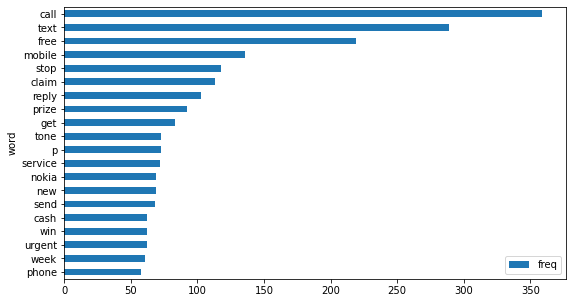

In [ ]:
spamword_freq[:20].pivot_table(
    values='freq',
    # columns='year',
    index='word'
).sort_values('freq', ascending=True).plot(kind='barh', figsize=(9, 5))

### ham words

In [ ]:
ham_df = df[df['Category']=='ham']
ham_df.head()

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif oni
3,ham,dun say early hor see already say
4,ham,nah think go usf life around though
6,ham,even brother like speak treat like aid patent


In [ ]:
ham_word2count = {}
for data in ham_df['Message']:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in ham_word2count.keys():
            ham_word2count[word] = 1
        else:
            ham_word2count[word] += 1

In [ ]:
ham_word2count

In [ ]:
ham_df['Message']

0       go jurong point crazy available bugis n great ...
1                                   ok lar joking wif oni
3                       dun say early hor see already say
4                     nah think go usf life around though
6           even brother like speak treat like aid patent
                              ...                        
5565                                              huh lei
5568                            b going esplanade fr home
5569                           pity mood soany suggestion
5570    guy bitching acted like would interested buyin...
5571                                       rofl true name
Name: Message, Length: 4825, dtype: object

In [ ]:
hamword_freq = pd.DataFrame({
    'word': ham_word2count.keys(),
    'freq': ham_word2count.values()
}).sort_values('freq', ascending=False).reset_index().drop(['index'], axis=1)
hamword_freq

,word,freq
0,get,318
1,go,278
2,ltgt,276
3,ok,273
4,got,245
...,...,...
6791,community,1
6792,outreach,1
6793,lb,1
6794,brilliantly,1


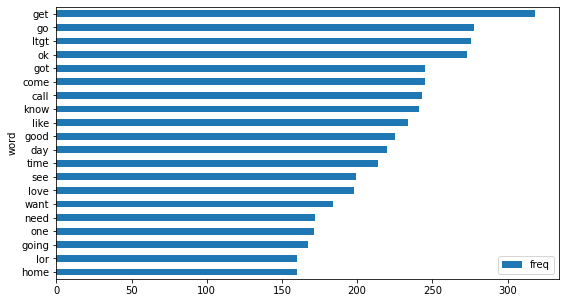

In [ ]:
hamword_freq[:20].pivot_table(
    values='freq',
    # columns='year',
    index='word'
).sort_values('freq', ascending=True).plot(kind='barh', figsize=(9, 5))

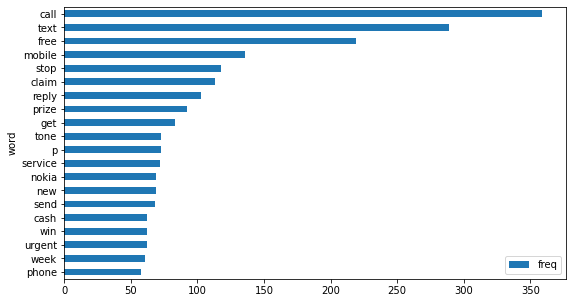

In [ ]:
spamword_freq[:20].pivot_table(
    values='freq',
    # columns='year',
    index='word'
).sort_values('freq', ascending=True).plot(kind='barh', figsize=(9, 5))

In [ ]:
word2count = {}
for data in df['Message']:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [ ]:
word_freq = pd.DataFrame({
    'word': word2count.keys(),
    'freq': word2count.values()
}).sort_values('freq', ascending=False).reset_index().drop(['index'], axis=1)
word_freq

,word,freq
0,call,602
1,get,401
2,text,379
3,go,311
4,free,278
...,...,...
7882,lb,1
7883,outreach,1
7884,soil,1
7885,african,1


## Split data

In [ ]:
text = df['Message']
label = df['Category']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text, label, train_size=0.8, random_state=42)

## Feature Extraction

### Bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 3000) 

X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.fit_transform(X_test).toarray()

In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
word2count = {}
wordcount = {}
for data in X_train:
    words = nltk.word_tokenize(data)
    for word in words:
        wordcount[word] = 0
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [ ]:
import numpy

In [ ]:
def TransformBOW(X_train):
    bag = []
    # n = 0
    for data in X_train:
        blank_wordcount = wordcount.copy()
        # print("FBlank:\t", blank_wordcount)
        words = nltk.word_tokenize(data)
        # print("Words:\t", words)
        for word in words:
            if word in blank_wordcount.keys():
                blank_wordcount[word] += 1
        # print("Blank:\t", blank_wordcount)
        # print(list(blank_wordcount.values()))
        # print()
        # n += 1
        # if n>3:
        #     break
        bag.append(list(blank_wordcount.values()))
    return numpy.asarray(bag)

In [ ]:
x_train = TransformBOW(X_train)
x_test = TransformBOW(X_test)

In [ ]:
word_freq = pd.DataFrame({
    'word': word2count.keys(),
    'freq': word2count.values()
}).sort_values('freq', ascending=False).reset_index().drop(['index'], axis=1)
word_freq

,word,freq
0,call,487
1,get,327
2,text,301
3,go,248
4,free,234
...,...,...
6934,costmax,1
6935,parentsi,1
6936,tensed,1
6937,rencontre,1


### TF-IDF

In [ ]:
word2count

In [ ]:
# calculating tf-idf values
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf = TfidfVectorizer()
train_tfidf = tfidf.fit_transform(X_train).todense()
# X_test = tfidf.fit_transform(X_test).todense()

# tfidf_df = pd.DataFrame(
# 	features.todense(),
#     # features.toarray(),
# 	columns = tfidf.get_feature_names_out()
# )

In [ ]:
def compute_tf(bow, doc):
    tf = []
    for i in range(len(doc)):
        tf_dict ={}
        doc_count = len(word_tokenize(doc[i]))
        # print("total term", doc_count)
        for word, count in bow[i].items():
            tf_dict[word] = count/doc_count
        tf.append(tf_dict)
    return tf

def compute_idf(docs):    
    import math
    N = len(docs)
    idfDict = dict.fromkeys(word2count.keys(),0)
    for doc in docs:
        for word, val in doc.items():
            if (val > 0 and word in idfDict.keys()):
                idfDict[word] +=1


    for word, val in idfDict.items():
        # standard notation
        if val!=0:
            idfDict[word] = math.log(N / float(val))
        else:
            idfDict[word] = 0
        #sklearn notation
        #idfDict[word] = (math.log((N+1) / (val+1))) + 1

    return idfDict

def compute_tfidf(tf, idf):
    tfidf = []
    for i in tf:
        tfidf_dict = dict.fromkeys(word2count.keys(),0)
        for word, tfVal in i.items():
            if word in word2count.keys():
                tfidf_dict[word] = tfVal * idf[word]

        tfidf.append(list(tfidf_dict.values()))
    return tfidf

def TransformTFIDF(X_train):
    tfs = compute_tf(tf_word2count, X_train.to_list())
    idfs = compute_idf(tf_word2count)
    tfidfs = compute_tfidf(tfs, idfs)
    
    return numpy.asarray(tfidfs)

def TransformTFIDF4Test(X_test):
    tfs = compute_tf(BoWforTest(X_test), X_test.to_list())
    idfs = compute_idf(BoWforTest(X_test))
    tfidfs = compute_tfidf(tfs, idfs)
    
    return numpy.asarray(tfidfs)

def BoWforTest(texts):
    bow_tf_word2count = []
    for data in texts:
        doc_word2count = {}
        words = nltk.word_tokenize(data)
        for word in words:
            if word not in doc_word2count.keys():
                doc_word2count[word] = 1
            else:
                doc_word2count[word] += 1
        bow_tf_word2count.append(doc_word2count)
    return bow_tf_word2count


TF(m) = term m in doc / total term in doc

IDF(m) = total number of docs / number of docs having term m

In [ ]:
# tfidfs = compute_tfidf(tfs, idfs)
tf_word2count = []
word2count = {}
wordcount = {}
for data in X_train:
    doc_word2count = {}
    words = nltk.word_tokenize(data)
    for word in words:
        wordcount[word] = 0
        if word not in doc_word2count.keys():
            doc_word2count[word] = 1
        else:
            doc_word2count[word] += 1
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1
    tf_word2count.append(doc_word2count)
x_train = TransformTFIDF(X_train)
x_test = TransformTFIDF4Test(X_test)

## Training model

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
gnb = GaussianNB()
# model = gnb.fit(X_train, y_train, cross_validate)
# scores = cross_val_score(gnb, X_train, y_train, cv=10)

In [ ]:
# scores

array([0.88565022, 0.86995516, 0.87892377, 0.87892377, 0.87892377,
       0.88116592, 0.8632287 , 0.85842697, 0.88764045, 0.87640449])

In [ ]:
model = gnb.fit(x_train, y_train)

In [ ]:
model.score(x_train, y_train)

0.9427866277765313

In [ ]:
pred = model.predict(numpy.array(x_test))

In [ ]:
y_pred = numpy.array(list(map(lambda x: 1 if x=='spam' else 0, pred)))
y_true = numpy.array(list(map(lambda x: 1 if x=='spam' else 0, y_test.to_list())))

In [ ]:
accuracy_score(y_true, y_pred)

0.8825112107623319

In [ ]:
f1_score(y_true, y_pred)

0.6649616368286445

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr_model = lr.fit(x_train, y_train)
lr_model.score(x_train, y_train)

0.9881085932241418

In [ ]:
pred_lr = lr_model.predict(x_test)

In [ ]:
y_pred = numpy.array(list(map(lambda x: 1 if x=='spam' else 0, pred_lr)))
y_true = numpy.array(list(map(lambda x: 1 if x=='spam' else 0, y_test.to_list())))

In [ ]:
accuracy_score(y_true, y_pred)

0.968609865470852

In [ ]:
f1_score(y_true, y_pred)

0.8736462093862817

In [ ]:
confusion_matrix(y_true, y_pred)

array([[966,   0],
       [ 19, 130]])

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=10, max_depth=None)
rf_model = rf.fit(x_train, y_train)
rf_model.score(x_train, y_train)

0.9966345075162666

In [ ]:
pred_rf = rf_model.predict(x_test)

In [ ]:
y_pred = numpy.array(list(map(lambda x: 1 if x=='spam' else 0, pred_rf)))
y_true = numpy.array(list(map(lambda x: 1 if x=='spam' else 0, y_test.to_list())))

In [ ]:
accuracy_score(y_true, y_pred)

0.9721973094170404

In [ ]:
f1_score(y_true, y_pred)

0.8838951310861423